In [2]:
import os
import pandas as pd
from zlib import crc32  


In [3]:
file_path = r"D:\ML_PROJECTS\house\housing.csv"
df = pd.read_csv(file_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

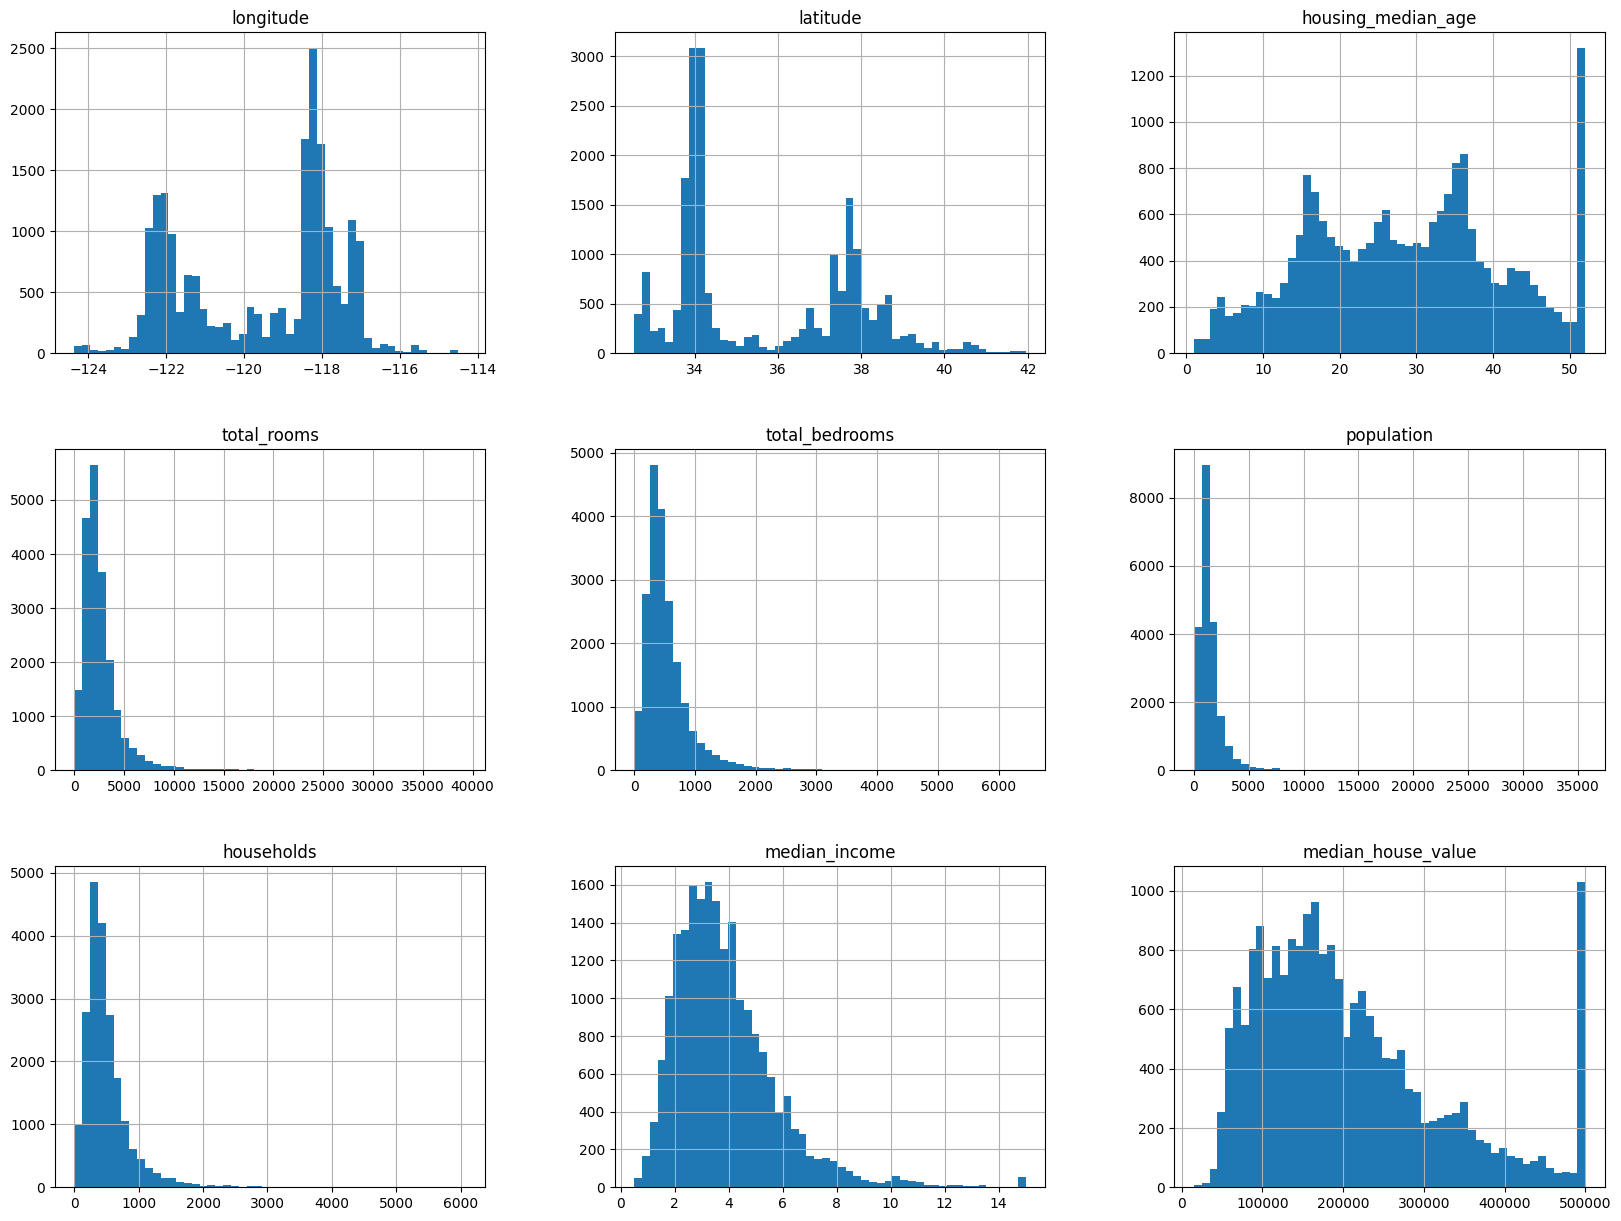

In [6]:
import matplotlib.pyplot as plt
df.hist(bins=50 , figsize=(20,15))

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (120, 4) Test size: (30, 4)


In [8]:
import numpy as np
df["income_cat"]=pd.cut(df["median_income"],
                        bins=[0.,1.5,3.0,4.5,6.,np.inf],
                        labels=[1,2,3,4,5])

<Axes: >

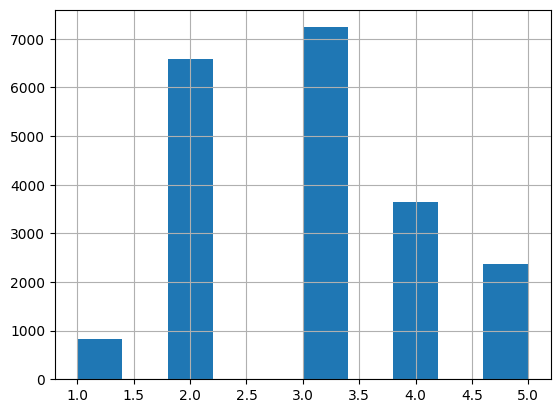

In [9]:
df["income_cat"].hist()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1 ,test_size=0.2 ,random_state=42)
for train_index ,test_index in split.split(df,df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set=df.loc[test_index]
    
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [11]:
for set_ in(strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [12]:
df=strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

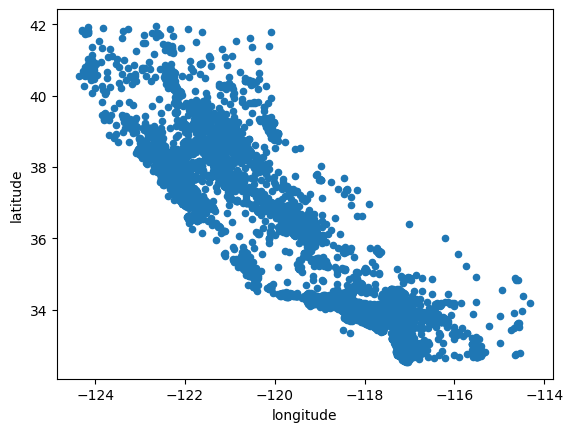

In [13]:
df.plot(kind="scatter" , x="longitude" , y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

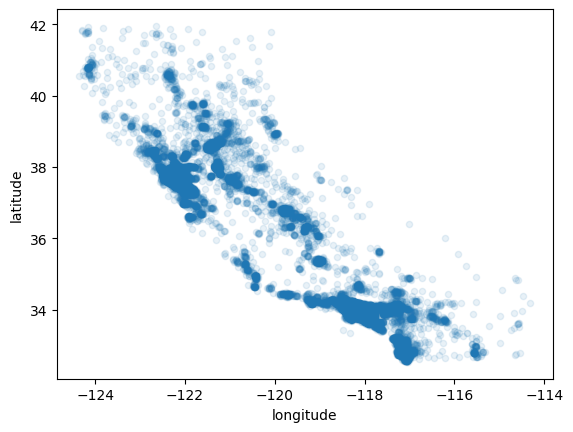

In [14]:
df.plot(kind="scatter" , x="longitude" , y="latitude" , alpha = 0.1)

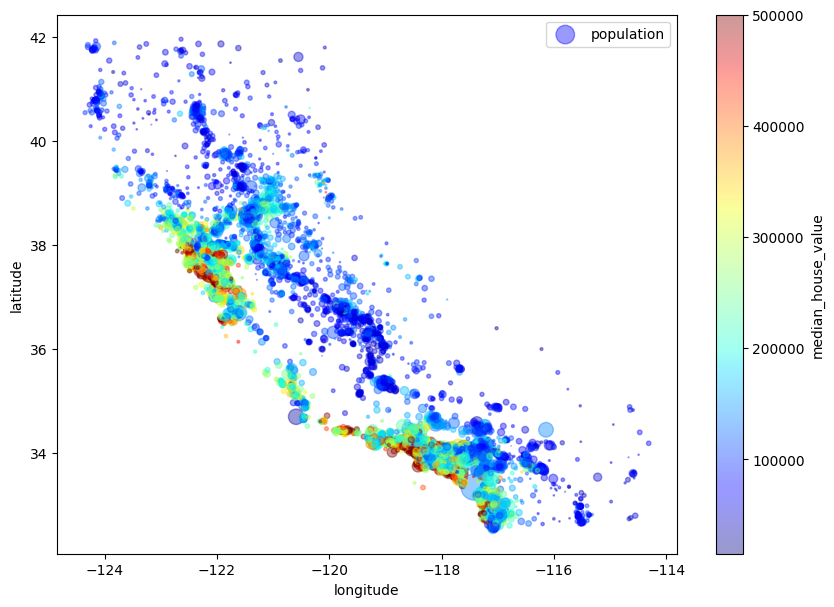

In [15]:
df.plot(kind="scatter" , x="longitude" , y="latitude" , alpha = 0.4 ,
        s=df["population"]/100 , label="population" , figsize=(10,7),
        c="median_house_value" , cmap=plt.get_cmap("jet"),colorbar=True ,)
plt.legend()

In [22]:
#corr_matrix=df.corr()
#corr_matrix["median_house_value"].sort_values(ascending=False)
df = pd.get_dummies(df, drop_first=True)


In [23]:
corr_matrix=df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.687151
ocean_proximity_NEAR BAY      0.158691
ocean_proximity_NEAR OCEAN    0.137332
total_rooms                   0.135140
housing_median_age            0.114146
households                    0.064590
total_bedrooms                0.047781
ocean_proximity_ISLAND        0.013708
population                   -0.026882
longitude                    -0.047466
latitude                     -0.142673
ocean_proximity_INLAND       -0.482853
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

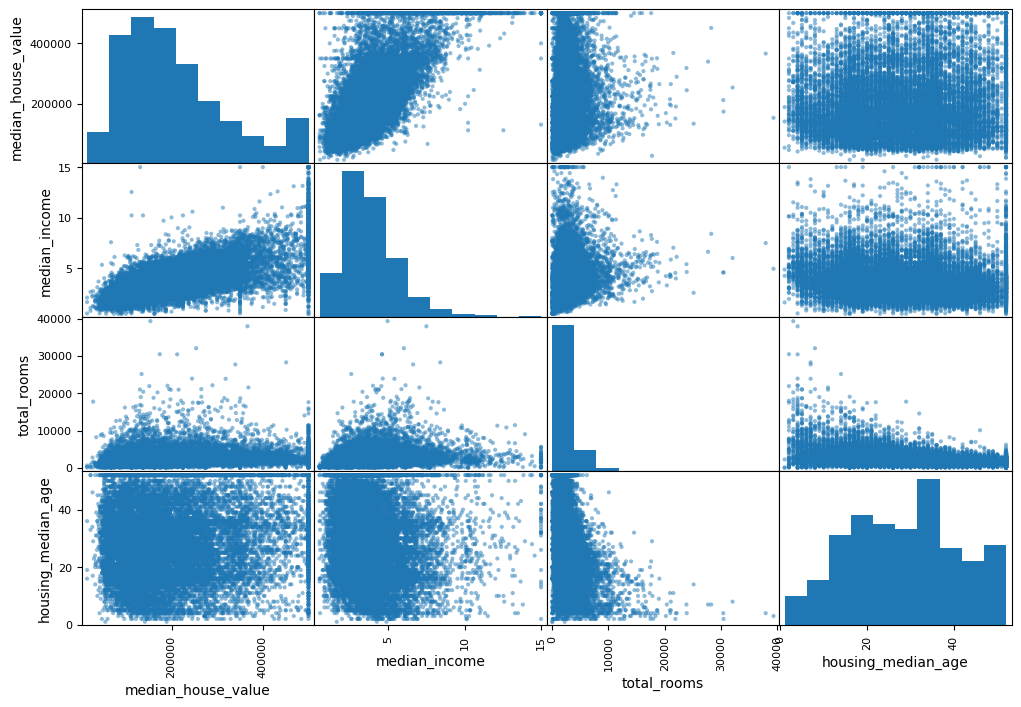

In [24]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(df[attributes],figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

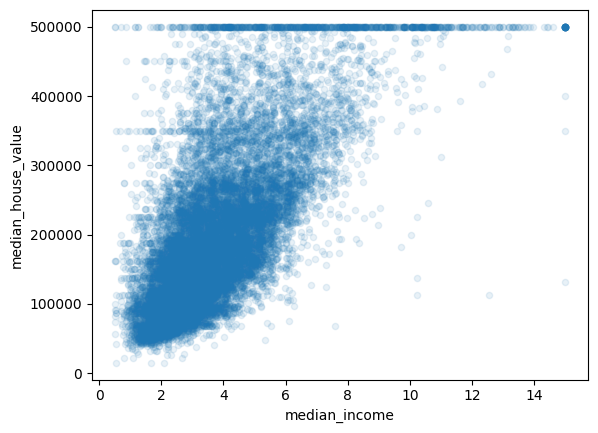

In [25]:
df.plot(kind="scatter" , x="median_income" , y="median_house_value" , alpha = 0.1)

In [27]:
df["room_per_household"]=df["total_rooms"]/df["households"]
df["bedrooom_per_room"]=df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]
corr_matrix=df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.687151
ocean_proximity_NEAR BAY      0.158691
room_per_household            0.146255
ocean_proximity_NEAR OCEAN    0.137332
total_rooms                   0.135140
housing_median_age            0.114146
households                    0.064590
total_bedrooms                0.047781
ocean_proximity_ISLAND        0.013708
population_per_household     -0.021991
population                   -0.026882
longitude                    -0.047466
latitude                     -0.142673
bedrooom_per_room            -0.259952
ocean_proximity_INLAND       -0.482853
Name: median_house_value, dtype: float64

In [28]:
df=strat_train_set.drop("median_house_value",axis=1)
df_labels=strat_train_set["median_house_value"].copy()